In [182]:
import numpy as np

In [211]:
def create_matrix(grid):  
    matrix = []
    C = np.zeros(len(grid)-1)
    A = np.zeros(len(grid)-1)
    B = np.zeros(len(grid))
    h = grid[1] - grid[0]
    for i in range(len(grid)):
     
        if i == 0:
            B[i] = 1  
        elif i == len(grid)-1:
            
            B[i] = 1
        else:
            A[i-1] =  -0.5 / h**2
            B[i] = -1 - 0.5 * (grid[i] ) ** 2
            C[i-1] = -0.5/h**2


    return A,B,C

In [212]:
# def create_matrix(grid):
#     n = len(grid)
#     h = grid[1] - grid[0]
#     # diagonals = [np.ones(n-1)*0.5, (-1 - 0.5*((grid)**2))*np.ones(n), 0.5*np.ones(n-1)] ## задание элементов диагоналей матрицы
#     diagonals = [np.ones(n-1) * -0.5 / h**2,-0.5/h**2 * -2 + grid**2 * 0.5, np.ones(n-1) * -0.5 / h**2]
#     matrix = np.diag(diagonals[0], k=-1) + np.diag(diagonals[1], k=0) + np.diag(diagonals[2], k=1)
#     matrix[0,0] = 1
#     matrix[0,1] = 0
#     matrix[n-1,n-1] = 1
#     matrix[n-1,n-2] = 0
#     return matrix

In [213]:
grid = np.linspace(-10, 10, 10000)
A,B,C = create_matrix(grid)

In [214]:
# A[100], B[100], C[100]

In [215]:

# matrix  = np.linalg.inv(create_matrix(grid))


In [216]:
def tridiagonal_matrix_algoritm(A, B, C, F):
    alpha = np.zeros(len(A)+1)
    beta = np.zeros(len(alpha))
    
    alpha[1] = -C[0]/B[0]
    beta[1] = F[0]/B[0]
    for i in range(2, len(alpha)):
        alpha[i] = -C[i-1]/(A[i-1] * alpha[i-1] + B[i-1])
        beta[i] = (F[i - 1] - A[i - 1] * beta[i - 1])/(A[i - 1] * alpha[i - 1] + B[i - 1])
    return alpha, beta

def finding_x(alpha, beta, F, A,B,C):
    x = np.zeros_like(alpha)

    x[-1] = (F[-1] - A[-1] * beta[-1])/(B[-1] + A[-1] * alpha[-1])
    for i in range(len(alpha)-2, -1, -1):
        x[i] = alpha[i+1] * x[i+1] + beta[i+1]
    return x


In [217]:
import matplotlib.pyplot as plt
def find_eigen_vector(A, B,C, grid):
    u0 = np.ones(len(grid))
    u0[0] = 0
    u0[-1] = 0
    for i in range(20):
        alpha, beta = tridiagonal_matrix_algoritm(A, B,C, u0)
        unnormed_u1 = finding_x(alpha, beta, u0, A, B, C)
        u1 = unnormed_u1
        # print(u1[len(matrix)//2]/u0[len(matrix)//2] - u1[len(matrix)//2+1]/u0[len(matrix)//2+1] )
        # plt.plot(grid, np.abs(u1), color = 'orange')
        # plt.plot(grid, np.abs(u0))
        # print(i)
        # plt.show()
        # plt.close()

        # if np.abs(np.abs(u1[10]/u0[10]) - np.abs(u1[100]/u0[100])) < 1e-10:
        #     print('gg')

        #     return u1, u1[len(matrix)//2]/u0[len(matrix)//2]
        print(u1[len(grid)//2]/u0[len(grid)//2])
        # print(u1)
        u0 = u1
    return u1, u1[len(grid)//2]/u0[len(grid)//2]


In [218]:
eigen_vector, eigen_value = find_eigen_vector(A, B, C, grid)

0.024182279343668924
0.0071298491060625465
0.19258618305021258
0.027306404613132593
0.06215618103593601
0.040579637769967945
0.04930918577214757
0.04496604518326589
0.04688608414882781
0.04600513932064381
0.04639640907441907
0.046222213250594966
0.046298907266000375
0.04626525249466687
0.04627994113362698
0.0462735520073321
0.04627632164504304
0.04627512425167394
0.0462756406715436
0.04627541840135973


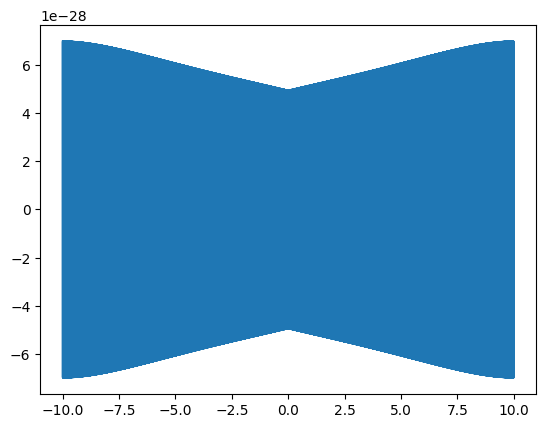

In [219]:
import matplotlib.pyplot as plt

plt.plot(grid, eigen_vector)

In [220]:
eigen_value

1.0

Найдем собственные значения

In [66]:
eig_val1, eig_vec1 = np.linalg.eig(matrix)
eig_val1.max()

1.0

In [67]:
matrix

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.3752904 , -0.3752904 ,  0.14085273, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.14085273,  0.14085273, -0.428181  , ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [-0.        , -0.        , -0.        , ..., -0.428181  ,
         0.14085273,  0.14085273],
       [-0.        , -0.        , -0.        , ...,  0.14085273,
        -0.3752904 , -0.3752904 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

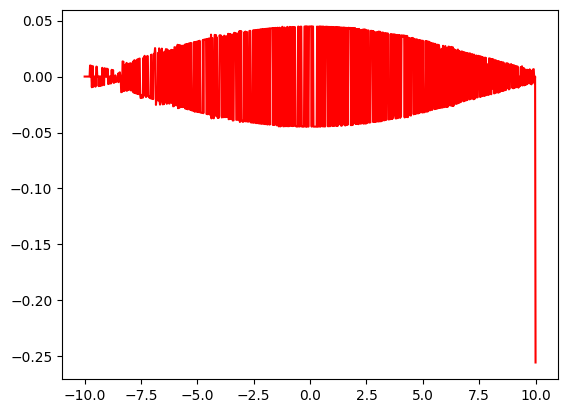

In [68]:
# plt.plot(grid, eigen_vector)
plt.plot(grid, eig_vec1[998], color = 'red')